In [8]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
#2 Importing the Mall_Customers dataset by pandas
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [10]:
import io
dataset= pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [11]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
X = dataset.iloc[:, [3, 4]].values

In [13]:
print (X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

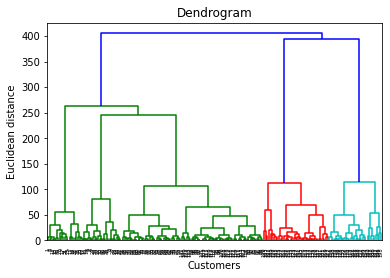

In [15]:
#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is 
#an open source Python library that contains tools to do 
#hierarchical clustering and building dendrograms. Only import the 
#needed tool.
import scipy.cluster.hierarchy as sch

#Lets create a dendrogram variable linkage is actually the algorithm 
#itself of hierarchical clustering and then in linkage we have to 
#specify on which data we apply and engage. This is X dataset
#Ward method is actually a method that tries to minimize the variance within each cluster.
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [16]:
# for above diagram
#The x-axis consists of the customers and y-axis consists of the Euclidean distance between the clusters. 
#How do we determine the optimal number of clusters from this diagram? 
#We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. 
#Let's count the number of lines on the diagram and determine the optimal number of clusters. 
#Cluster number will be 5 for this dataset.
# refer ppt diagram

In [18]:
#4 Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: #Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

# Lets try to fit the hierarchical clustering algorithm  to dataset 
#X while creating the clusters vector that tells for each customer 
#which cluster the customer belongs to.
y_hc = hc.fit_predict(X)

In [ ]:
print(X)

In [ ]:
print(y_hc)

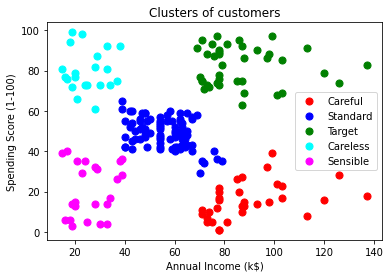

In [21]:
#5 Visualizing the clusters. This code is similar to k-means 
#visualization code. We only replace the y_kmeans vector name to 
#y_hc for the hierarchical clustering

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()